In [1]:
import pyrootutils
import os
root = pyrootutils.setup_root(search_from=os.path.abspath(''), pythonpath=True, cwd=True, indicator=".project-root")

#from libs_snap.anomdiff.src.datamodules.cnst_lhco import LHCOLowDataset
import logging
import hydra
from pathlib import Path
from hydra.core.global_hydra import GlobalHydra

from omegaconf import DictConfig, OmegaConf
from transit.src.utils.hydra_utils import instantiate_collection, log_hyperparameters, print_config, reload_original_config, save_config
log = logging.getLogger(__name__)
import matplotlib.pyplot as plt
import numpy as np
import copy



In [2]:
#load the config file
if GlobalHydra().is_initialized():
    GlobalHydra().clear()
with hydra.initialize(version_base=None, config_path= "../config"):
	cfg = hydra.compose(config_name="TRANSIT_LLV_v11pe_32cst_nomask.yaml")
	#print(OmegaConf.to_yaml(cfg))

In [3]:
if GlobalHydra().is_initialized():
    GlobalHydra().clear()
hydra.initialize(version_base=None, config_path= "../config")
log.info("Loading training config")
cfg_exp = cfg.step_export_template
print(cfg_exp.paths.full_path)


workspaces/TRANSIT_LLV/TRANSIT_LLV_v11pe_32cst_nomask/template


In [4]:
orig_cfg = reload_original_config(cfg_exp, get_best=cfg_exp.get_best)
cfg_exp = orig_cfg

In [5]:
orig_cfg.model._target_

'transit.src.models.transit_model.transit'

In [6]:
device = "cpu"
model_class = hydra.utils.get_class(orig_cfg.model._target_)
model = model_class.load_from_checkpoint(orig_cfg.ckpt_path, map_location=device)

SELECTED NETWORK TYPE:  partial_context


In [7]:
datamodule = hydra.utils.instantiate(orig_cfg.data.datamodule)
datamodule.setup("fit")

In [8]:
train_dataloader = datamodule.train_dataloader()

In [9]:
batch = next(iter(train_dataloader))
batch_orig = copy.deepcopy(batch)

(array([3.1524e+04, 1.3187e+04, 5.8450e+03, 3.2670e+03, 2.1380e+03,
        1.5680e+03, 1.1410e+03, 9.6800e+02, 7.4200e+02, 5.6000e+02,
        4.9300e+02, 3.9700e+02, 3.4900e+02, 3.2500e+02, 2.6400e+02,
        2.5200e+02, 2.1100e+02, 1.8300e+02, 1.4500e+02, 1.3700e+02,
        1.3200e+02, 1.1600e+02, 1.1500e+02, 9.1000e+01, 8.6000e+01,
        7.7000e+01, 8.4000e+01, 7.2000e+01, 7.5000e+01, 5.5000e+01,
        5.6000e+01, 7.2000e+01, 4.3000e+01, 5.6000e+01, 4.2000e+01,
        5.1000e+01, 4.2000e+01, 3.2000e+01, 2.0000e+01, 4.0000e+01,
        3.2000e+01, 3.7000e+01, 2.2000e+01, 1.3000e+01, 2.6000e+01,
        3.2000e+01, 1.9000e+01, 2.7000e+01, 1.8000e+01, 1.6000e+01,
        1.4000e+01, 9.0000e+00, 2.0000e+01, 1.5000e+01, 8.0000e+00,
        1.3000e+01, 7.0000e+00, 8.0000e+00, 1.4000e+01, 8.0000e+00,
        1.1000e+01, 1.5000e+01, 5.0000e+00, 5.0000e+00, 5.0000e+00,
        1.0000e+01, 4.0000e+00, 6.0000e+00, 6.0000e+00, 1.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 3.00

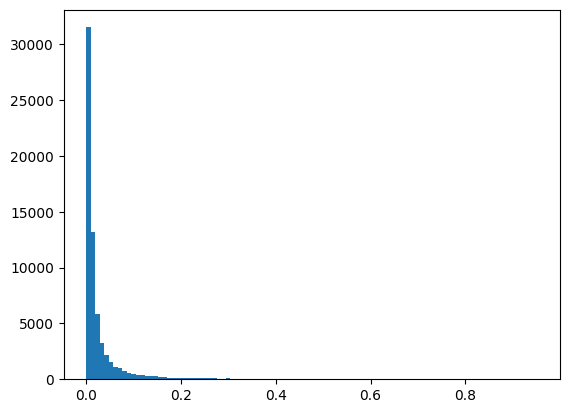

In [10]:
plt.hist(batch[0].numpy()[:, :, 0].flatten(), bins=100)

In [11]:
batch[0]

tensor([[[ 2.8010e-01, -5.6748e-03,  5.1776e-02],
         [ 1.2071e-01,  4.6443e-02,  2.6345e-02],
         [ 6.5500e-02,  3.2468e-02, -1.3353e-01],
         ...,
         [ 5.8674e-03, -3.0640e-02,  1.7608e-01],
         [ 5.5569e-03, -9.8298e-02,  1.6867e-01],
         [ 5.3119e-03, -5.5555e-02,  3.9565e-02]],

        [[ 3.6461e-01, -5.7422e-02, -2.5755e-02],
         [ 1.0525e-01, -1.8883e-02, -6.1065e-02],
         [ 7.3196e-02,  1.2854e-01,  1.2128e-01],
         ...,
         [ 4.0435e-03,  5.4335e-02,  9.2533e-02],
         [ 3.7131e-03, -7.6008e-02,  3.7939e-02],
         [ 3.6131e-03,  1.8328e-01,  1.2484e-01]],

        [[ 4.4048e-01, -2.6777e-03, -3.1810e-03],
         [ 2.7587e-01,  4.7208e-03,  8.1665e-03],
         [ 1.4096e-01, -2.6414e-04, -5.5993e-03],
         ...,
         [ 0.0000e+00,  0.0000e+00, -0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -0.0000e+00]],

        ...,

        [[ 3.9113e-01, -1.9537e-02, -1

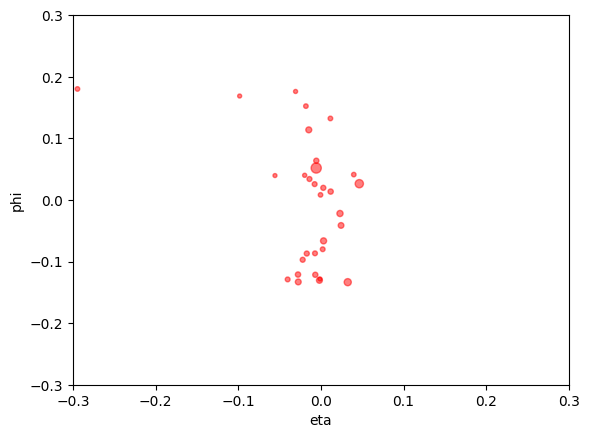

In [12]:
def plot_particle_cloud(particles, ax=None, lm=0.3, c="red"):
    plt.scatter(particles[:, 1], particles[:, 2], s=100*np.sqrt(particles[:, 0])+1, alpha=0.5, c=c)
    plt.xlabel("eta")
    plt.ylabel("phi")
    plt.xlim(-lm, lm)
    plt.ylim(-lm, lm)
    return ax

plt.figure()
plot_particle_cloud(batch[0][0].numpy())

In [13]:
for i, ten in enumerate(batch):
    batch[i]=ten[:1000]

In [14]:
batch[2][:, 0]

tensor([1154.3932, 1225.3873, 1395.6973, 1151.7611, 1676.0819, 1812.0618,
        1410.0048, 1140.9098, 2085.8806, 1316.3528, 1405.1172, 1307.5787,
        1196.8381, 1210.2220, 1215.7338, 1207.7843, 1389.3937, 1704.9373,
        1002.3513, 1224.5736, 1184.3677, 1203.5405, 1438.3610, 1241.4756,
        1278.8677, 1294.2262, 1047.8561, 1511.6930, 1435.1693, 1243.9360,
        1276.0031, 1274.5208, 1490.3789, 1283.9330, 1594.4202, 1316.6519,
        1411.6545, 1045.3199, 1511.8787, 1255.4999, 1247.2850, 1105.7159,
        1126.7294, 1279.6068, 1787.1747, 1393.6053, 1415.0854, 1265.1942,
        1482.2936, 1090.1963, 1355.3071, 1760.5406, 1194.6860,  980.5948,
         872.6771,  842.4990, 1406.5070,  913.3679, 1253.0610, 2079.5156,
        1323.5114, 1269.2480, 1217.1716,  911.3762, 1293.3644, 1611.5681,
        1306.6094, 1378.5598, 2014.0527, 1427.1183, 1543.1786, 1211.4235,
        1483.1674, 1240.4525, 1614.3621, 1404.1880, 1300.0255, 1378.0148,
        1764.7806, 1290.7983, 1367.298

In [15]:
autoencoded = model.generate(batch)

In [16]:
batch[0][113].numpy()

array([[ 0.18416853, -0.03385029,  0.04053652],
       [ 0.15854721, -0.00159053,  0.05899227],
       [ 0.14407296, -0.04212597,  0.03061211],
       [ 0.08826118, -0.0387306 ,  0.0299195 ],
       [ 0.05366326,  0.12939617, -0.10893428],
       [ 0.05066246,  0.15046766, -0.10256803],
       [ 0.02837689, -0.04530207,  0.03714931],
       [ 0.02824103, -0.03273759,  0.02777397],
       [ 0.02361762,  0.0149044 , -0.12930095],
       [ 0.02119871, -0.0465186 ,  0.01264036],
       [ 0.02050457,  0.13396862, -0.12930739],
       [ 0.02043778, -0.04212377,  0.02900636],
       [ 0.0185407 ,  0.13224432, -0.07896101],
       [ 0.01773984,  0.05451139, -0.13221323],
       [ 0.01244708,  0.1325768 , -0.09483385],
       [ 0.01173289,  0.11501762, -0.09407163],
       [ 0.01082671,  0.1122435 , -0.09878373],
       [ 0.00956683, -0.03198049,  0.05467188],
       [ 0.00743225, -0.00172309, -0.015607  ],
       [ 0.00697026,  0.11325946, -0.15251946],
       [ 0.00657793,  0.12032732, -0.124

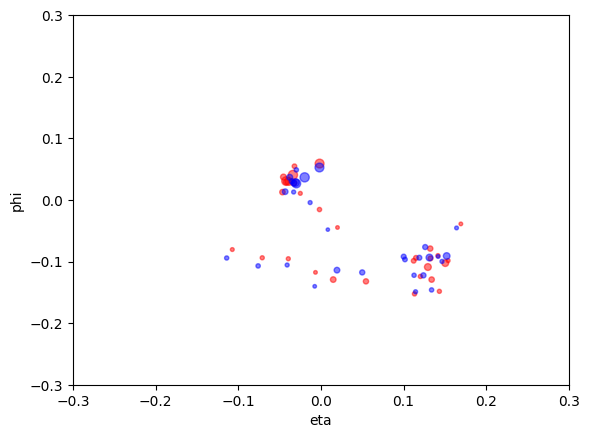

In [22]:
idx=113
plt.figure()
plot_particle_cloud(batch[0][idx].numpy())
plot_particle_cloud(autoencoded[idx].numpy(), c="blue")


In [ ]:
batch_new = [tens.clone() for tens in batch]
print(batch[3][:, 4])
batch_new[3][:, 4]+=2
generated = model.generate(batch_new)

tensor([77., 50., 17.])


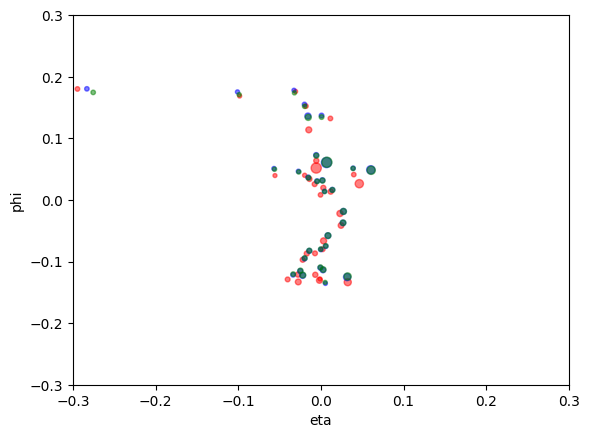

In [ ]:
idx=0
plt.figure()
plot_particle_cloud(batch[0][idx].numpy())
plot_particle_cloud(autoencoded[idx].numpy(), c="blue")
plot_particle_cloud(generated[idx].numpy(), c="green")

In [ ]:
(batch[0][idx].numpy()-autoencoded[idx].numpy())**2

array([[5.86726310e-06, 1.54449503e-04, 7.95590022e-05],
       [1.75085390e-07, 1.93060609e-04, 5.06962999e-04],
       [1.42680728e-05, 5.61776062e-07, 6.91015157e-05],
       [1.98653688e-05, 1.68571569e-05, 1.10406945e-05],
       [3.61342936e-05, 2.76373685e-05, 7.21054676e-05],
       [3.79417943e-05, 1.84403998e-05, 2.80985492e-04],
       [1.78135524e-05, 1.06238531e-06, 5.01062954e-04],
       [9.67380174e-07, 2.79444030e-05, 1.10203044e-04],
       [1.89667151e-06, 5.43136321e-06, 1.74821434e-05],
       [5.07687218e-06, 7.42767315e-06, 3.09704155e-05],
       [1.97430145e-05, 4.03945569e-06, 7.87866156e-06],
       [3.80799179e-06, 3.08368122e-08, 8.38867127e-05],
       [2.05722299e-05, 3.70501220e-05, 1.28271698e-04],
       [3.16191745e-07, 1.33335459e-06, 1.50713429e-04],
       [9.64016706e-08, 8.94455570e-06, 1.84360088e-05],
       [3.49917059e-06, 5.25544874e-06, 4.24926475e-06],
       [6.69306974e-06, 2.26626025e-06, 6.71063162e-06],
       [1.00445632e-05, 8.13056

In [ ]:
log.info("Loading run information")
orig_cfg = reload_original_config(cfg, get_best=cfg.get_best)

log.info("Loading best checkpoint")
device = "cuda" if T.cuda.is_available() else "cpu"
model_class = hydra.utils.get_class(orig_cfg.model._target_)
model = model_class.load_from_checkpoint(orig_cfg.ckpt_path, map_location=device)

# Instantiate the datamodule use a different config for data then for training
if hasattr(orig_cfg, "data"):
    datamodule = hydra.utils.instantiate(cfg.data)
else:
    datamodule = hydra.utils.instantiate(orig_cfg.datamodule)

if hasattr(datamodule, "setup"):
    datamodule.setup("test")

# Cycle through the datasets and create the dataloader
log.info("Running latent prediction")
model.eval() #PL should do it but I just do it to be sure
e1s = []
for batch in datamodule.test_dataloader():
    e1s.append(model.encode_content(batch[0].to(device), batch[1].to(device)))
vars = [f"e1_{i}" for i in range(e1s[0].shape[1])]
dataset_dict = {var: T.hstack([o[:, i] for o in e1s]).detach().cpu().numpy() for i, var in enumerate(vars)}
log.info("Saving outputs")
output_dir = Path(orig_cfg.paths.full_path, "outputs")
output_dir.mkdir(parents=True, exist_ok=True)
df = pd.DataFrame({k:v.reshape(-1) for k, v in dataset_dict.items()})
if hasattr(cfg, "output_name"):
    output_name = cfg.output_name
else:
    output_name = "latent_encoding"
df.to_hdf(output_dir / f"{output_name}.h5", key="latent", mode="w")
print(f"Saved template to {output_dir / f'{output_name}.h5'}")

ConfigAttributeError: Key 'get_best' is not in struct
    full_key: get_best
    object_type=dict